In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_pl.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv
/kaggle/input/entity-sentiment-extraction-news/sen_pl_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv


In [2]:
SEN_en_AMT_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv', index_col=False)
SEN_en_R_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv', index_col=False)
SEN_en_R_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv', index_col=False)
SEN_en_AMT_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv', index_col=False)

In [3]:
SEN_en_AMT_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,Negative
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,Neutral
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,Neutral
3,3,Trump’s Arrival in London Brings Controversy b...,Trump,Negative
4,4,Trump Steers Clear of War Footing Toward Iran,Trump,Neutral


In [4]:
SEN_en_R_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Set to Meet With Russia’s Top Diplomat T...,Trump,neutr


In [5]:
SEN_en_R_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Calls for NATO Expansion Into Middle East,Trump,pos


In [6]:
SEN_en_AMT_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,neg
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,neutr
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,neutr
3,3,Trump Praises Lame-Duck U.K. Leader Theresa May,Trump,neutr
4,4,Trump’s Arrival in London Brings Controversy b...,Trump,neg


In [7]:
len(SEN_en_AMT_df), len(SEN_en_AMT_nooutlier_df)

(1361, 1345)

In [8]:
len(SEN_en_AMT_df.headline.unique())

1337

<Axes: xlabel='majority_label', ylabel='count'>

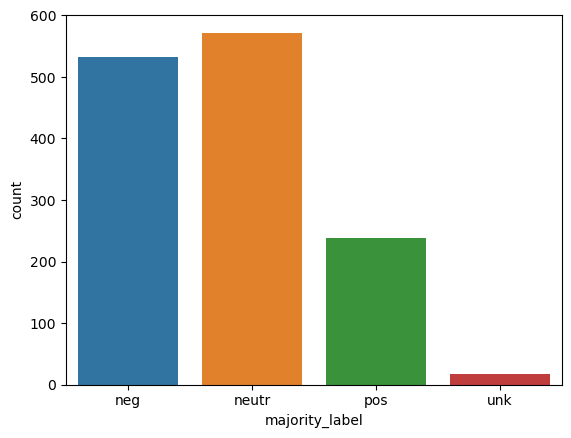

In [9]:
sns.countplot(SEN_en_AMT_df, x='majority_label')

In [10]:
len(SEN_en_R_df), len(SEN_en_R_nooutlier_df)

(1271, 1120)

<Axes: xlabel='majority_label', ylabel='count'>

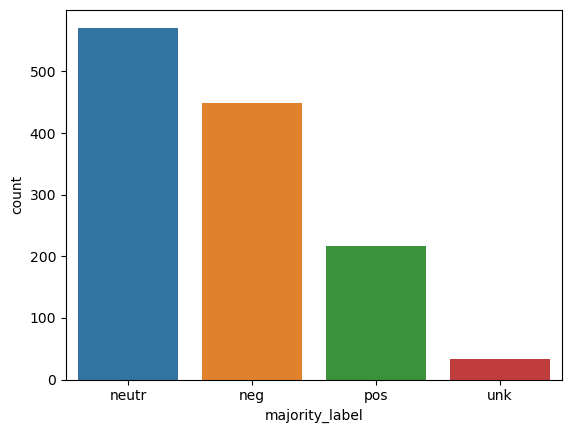

In [11]:
sns.countplot(SEN_en_R_df, x='majority_label')

In [14]:
SEN_en_AMT_df.iloc[0].headline

'Russia and Poland Feud Over Putin Remarks on World War II'

# Trying out with Bert-ABSA 
[Article](https://towardsdatascience.com/day-103-nlp-research-papers-utilizing-bert-for-aspect-based-sentiment-analysis-via-constructing-38ab3e1630a3)

In [30]:
# !python -m pip install newsapi-python

from newsapi import NewsApiClient
from tqdm import tqdm, notebook
import pandas as pd

API_KEY = 'key'
newsapi = NewsApiClient(api_key=API_KEY)

from datetime import datetime, timedelta

def get_past_time_range(days=1):
    past_days = {}
    for day in range(1, days):
        from_day = str(datetime.now().date() - timedelta(days=day))
        to_day = str(datetime.now().date() - timedelta(days=day - 1))
        past_days.update({from_day:to_day})
    return past_days

def get_articles(query, days=5):
    past_days_filter = get_past_time_range(days)
    all_articles = []
    print(past_days_filter)
    for fromDate,toDate in notebook.tqdm(past_days_filter.items()):
        for page in range(1, 3):
            try:
                print(fromDate)
                response = newsapi.get_everything(q=query, language='en', from_param=fromDate, to=toDate,sort_by='relevancy', page=page)
                page_articles = response['articles']
                if len(page_articles) == 0: break
                all_articles.extend(page_articles)
            except:
                break
            
    return all_articles

articles = get_articles('Lok Sabha elections 2024')

print(len(articles))


articles_df = pd.DataFrame(articles)
articles_df.head()

articles_df.to_csv('articles-lok-sabha-election-2024.csv')

{'2023-06-18': '2023-06-19', '2023-06-17': '2023-06-18', '2023-06-16': '2023-06-17', '2023-06-15': '2023-06-16'}


  0%|          | 0/4 [00:00<?, ?it/s]

2023-06-18
2023-06-18
2023-06-17
2023-06-17
2023-06-16
2023-06-16
2023-06-15
2023-06-15
25


In [33]:
articles[0]['content']

'The arrest of Tamil Nadu minister and powerful leader from Karur, Senthil Balaji by the Enforcement Directorate (ED) and the public response of Chief Minister, M.K. Stalin that the DMK could not be c… [+4765 chars]'

In [27]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Lok Sabha&'
       'from=2023-05-19&'
       'sortBy=popularity&'
       'apiKey=856737b219bf4835acc6352ea966c67b'
      )

response = requests.get(url)

print(response.json())

{'status': 'ok', 'totalResults': 1266, 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'https://www.facebook.com/bbcnews', 'title': 'New parliament: PM Modi set to inaugurate building amid Opposition boycott', 'description': 'The new building will be opened under the shadow of a boycott by major opposition parties.', 'url': 'https://www.bbc.co.uk/news/world-asia-india-65718127', 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/6061/production/_129837642_newparl2.png', 'publishedAt': '2023-05-28T00:26:02Z', 'content': "Prime Minister Narendra Modi is set to inaugurate India's new parliament building despite a boycott of the ceremony by 19 opposition parties.\r\nThe opposition has criticised the government for not ask… [+2704 chars]"}, {'source': {'id': 'al-jazeera-english', 'name': 'Al Jazeera English'}, 'author': 'Tarushi Aswani', 'title': 'India’s opposition to boycott new parliament inauguration by Modi', 'description': "Nineteen opposition par